Customer Churn Classification using Machine Learning

In [7]:
#Step 0 - import the essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [8]:
#Step 1 - Gathering the data
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [9]:
df.head() #first 5 rows from the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
#Step 2 - Data cleaning or Data preprocessing

In [12]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df.drop(columns=['customerID'],inplace=True)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
categorical_cols=df.select_dtypes(include=['object']).columns

Converting the categorical variables into numeric:

1. One Hot Encoding

2. Label Encoding


In [13]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder=LabelEncoder()
for col in categorical_cols:
  df[col]=label_encoder.fit_transform(df[col])

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [21]:
#Step 3 - Exploratory Data Analysis

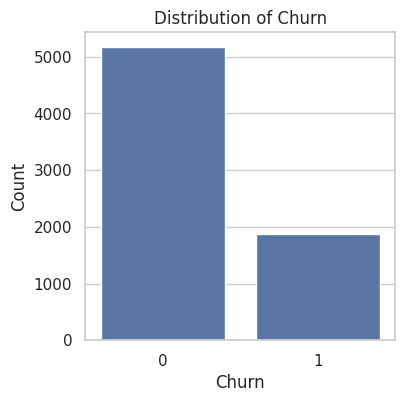

In [23]:
#Churn distribution
plt.figure(figsize=(4,4))
snr.countplot(x='Churn',data=df)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

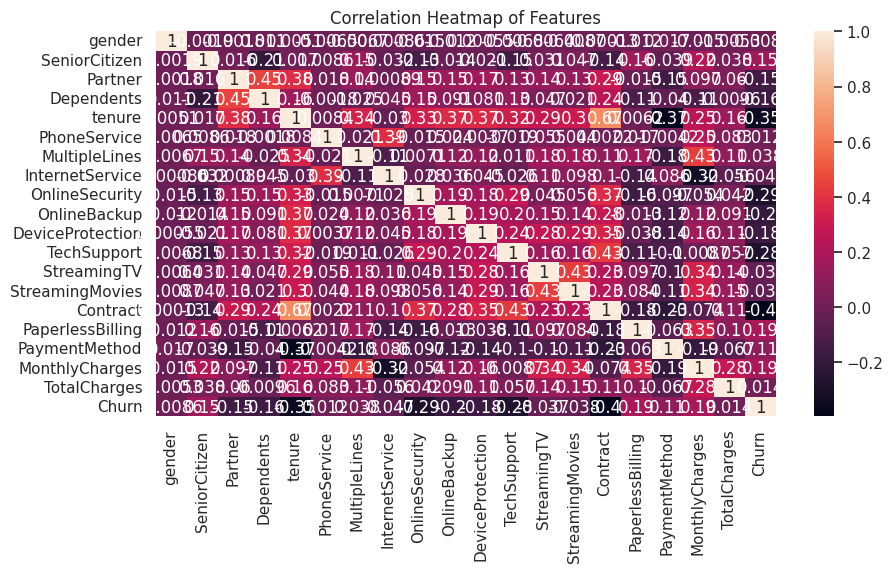

In [24]:
#correlation heatmap
plt.figure(figsize=(10,5))
correlation_matrix=df.corr() #.corr() helps in computing the correlation value for the columns
snr.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

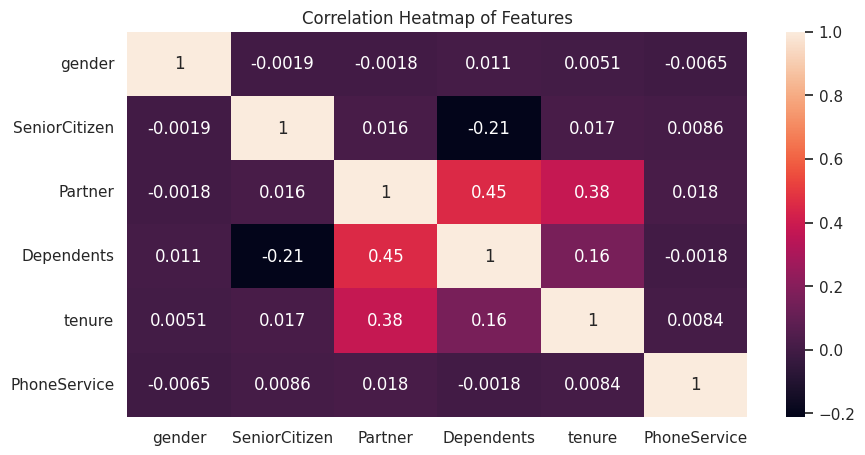

In [27]:
#correlation heatmap
plt.figure(figsize=(10,5))
correlation_matrix=df.iloc[:,0:6].corr() #.corr() helps in computing the correlation value for the columns
snr.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

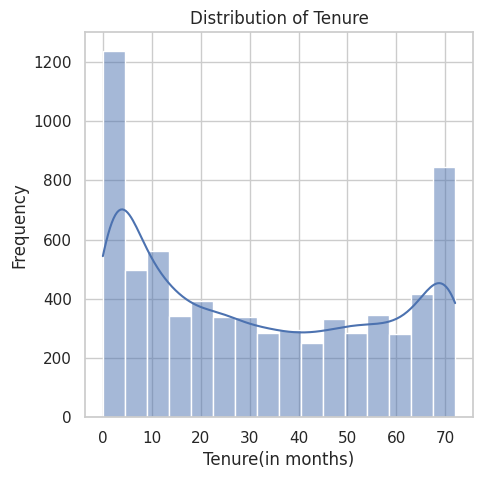

In [29]:
#Distribution of Tenure
plt.figure(figsize=(5,5))
snr.histplot(df['tenure'],kde=True)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure(in months)")
plt.ylabel("Frequency")
plt.show()

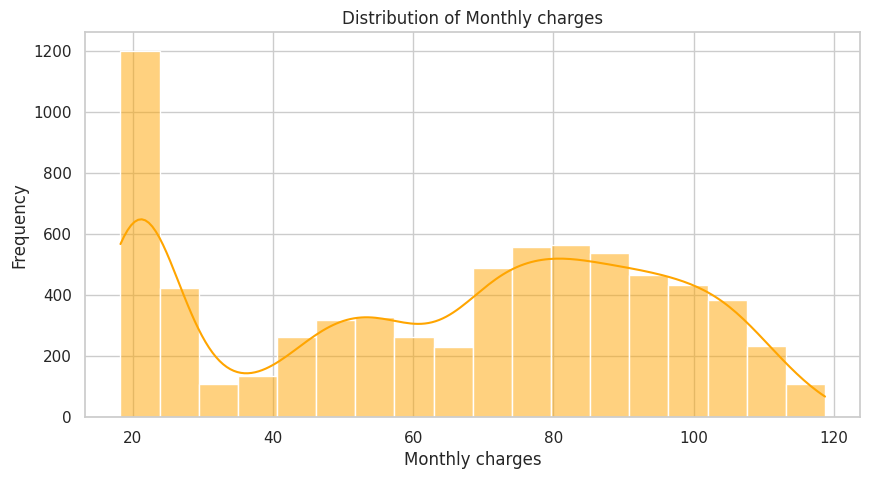

In [30]:
#Monthly charges distribution
plt.figure(figsize=(10,5))
snr.histplot(df['MonthlyCharges'],kde=True,color='Orange')
plt.title("Distribution of Monthly charges")
plt.xlabel("Monthly charges")
plt.ylabel("Frequency")
plt.show()